## Testing ML Classification Models in a Data Set

    This data set contains information about diabetes.
    It contains 243 rows and 23 columns.
    The dataset needs to be cleaned 

In [1]:
# import frameworks
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objs as go

#algorithms to use libraries

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder



from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_csv('DEALS PREDICT_NEW_check.csv')
df.head(10)

,S/N,DATE,NAME_OF_ENTITY,NATURE_OF_BUSINESS,BUSINESS_PROJECT,CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER,PROPOSED_FACILITY_AMOUNT,PURPOSE_OF_FACILITY,VALUE_CHAIN_CATEGORY,NAME_OF_BANK,...,SECURITY_PROPOSED,FEASIBILITY_STUDY_AVAILABLE,HIGHLIGHTS_OF_DISCUSSION,RM_BM_NAME_PHONE_NUMBER,RM_BM_EMAIL,STATUS_UPDATE,CHALLENGES,PROPOSED_NEXT_STEPS,STATE,TARGET
0,1,1/2/2023,COM10001,RICE PROCESSING,EXISTING,OB10001,2.000000e+09,WORKING CAPITAL ENHANCEMENT,MIDSTREAM,FIDELITY BANK PLC,...,NIL,YES,NaN,NaN,NaN,WE AREAWAITING CREDIT COMMITY DECITION ON WEAT...,NONE,NaN,ADAMAWA,1
1,2,1/2/2023,COM10002,FERTILIZER DISTRIBUTION ACROSS ADAMAWA,EXISTING,OB10002,5.000000e+07,WORKING CAPITAL ENHANCEMENT,PRE-UPSTREAM,FIDELITY BANK PLC,...,NIL,YES,NIL,NIL,NIL,WE ARE CURRENTLY WAITING FOR THE CLIENT TO CHO...,THE CLIENT IS ONLY WILLING TO DISTRIBUTE CRYST...,ONBOARD,ADAMAWA,1
2,3,1/2/2023,COM10003,BULL FEED FINISHING,EXISTING,OB10003,9.000000e+06,WORKING CAPITAL ENHANCEMENT,UPSTREAM,STANBIC IBTC,...,EQUITY CONTRIBUTION,YES,NIL,NIL,NIL,NaN,NaN,NaN,ADAMAWA,1
3,4,1/2/2023,COM10004,BULL FEED FINISHING,EXISTING,OB10004,1.000000e+05,WORKING CAPITAL ENHANCEMENT,UPSTREAM,STANBIC IBTC,...,EQUITY CONTRIBUTION,YES,NIL,NIL,NIL,NaN,NaN,NaN,ADAMAWA,0
4,5,1/2/2023,COM10005,BULL FEED FINISHING,EXISTING,OB10005,5.000000e+06,WORKING CAPITAL ENHANCEMENT,UPSTREAM,STANBIC IBTC,...,EQUITY CONTRIBUTION,YES,NIL,NIL,NIL,NaN,NaN,NaN,ADAMAWA,1
5,6,2/2/2023,COM10006,BULL FEED FINISHING,EXISTING,OB10006,5.000000e+07,WORKING CAPITAL ENHANCEMENT,UPSTREAM,STANBIC IBTC,...,EQUITY CONTRIBUTION,YES,NIL,NIL,NIL,NaN,NaN,NaN,ADAMAWA,1
6,7,2/2/2023,COM10007,PROCESSING,EXISTING,OB10007,5.000000e+08,EXPANSION OF FACTORY AND WORKING CAPITAL ENHAN...,MIDSTREAM,WEMA BANK,...,EQUITY CONTRIBUTION,YES,NIL,NIL,NIL,The promoter is still waiting for bank further...,scarcity of paddy and high cost of purchase,Factory is proposing its own primary productio...,BAUCHI,1
7,8,2/2/2023,COM10008,PROCESSING,EXISTING,OB10008,5.000000e+07,EXPANSION,MIDSTREAM,STERLING BANK,...,FACTORY,YES,NIL,NIL,NIL,The bank asked the promoter to submit his fina...,The Bank is having challenges of Loan default ...,We are considering Jaiz bank if nothing has be...,BAUCHI,0
8,9,1/2/2023,COM10009,PRODUCE AGGREGATION,EXISTING,OB10009,5.000000e+07,EXPANSION,MIDSTREAM,STERLING BANK,...,LANDED PROPERTY,YES,NIL,NIL,NIL,The promoter is working on his financials,NaN,Encourage the customer to hasten the process o...,BAUCHI,0
9,10,1/2/2023,COM10010,Animal (chicken/fish) feed dealer,EXISTING,OB10010,5.000000e+07,Expansion of Animal Feeds Business,UPSTREAM,Stanbic IBTC,...,NaN,NO,NIL,NIL,NIL,The Transaction at sterling bank is still on a...,The Challenges faced in some transaction is ma...,We the CRG desk officer have decided to introd...,BORNO,0


In [3]:
df.shape

(243, 23)

In [4]:
df.isnull().sum()

S/N                                      0
DATE                                     0
NAME_OF_ENTITY                           2
NATURE_OF_BUSINESS                       1
BUSINESS_PROJECT                         0
CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER     0
PROPOSED_FACILITY_AMOUNT                 0
PURPOSE_OF_FACILITY                      3
VALUE_CHAIN_CATEGORY                     0
NAME_OF_BANK                            22
BORROWING_RELATIONSHIP                   0
FRESH_LOAN_REQUEST                       0
REQUEST_SUBMITTED_TO_BANK                0
SECURITY_PROPOSED                       13
FEASIBILITY_STUDY_AVAILABLE              0
HIGHLIGHTS_OF_DISCUSSION                 1
RM_BM_NAME_PHONE_NUMBER                  1
RM_BM_EMAIL                              1
STATUS_UPDATE                           33
CHALLENGES                              73
PROPOSED_NEXT_STEPS                     43
STATE                                    3
TARGET                                   0
dtype: int6

In [5]:
#cleaning the data sets missing
#filling missing values with median/mode occurenece and returning it to the column

df['VALUE_CHAIN_CATEGORY']= df['VALUE_CHAIN_CATEGORY'].fillna(df['VALUE_CHAIN_CATEGORY'].mode()[0])
df['SECURITY_PROPOSED']= df['SECURITY_PROPOSED'].fillna(df['SECURITY_PROPOSED'].mode()[0])
df['HIGHLIGHTS_OF_DISCUSSION']= df['HIGHLIGHTS_OF_DISCUSSION'].fillna(df['HIGHLIGHTS_OF_DISCUSSION'].mode()[0])
df['RM_BM_NAME_PHONE_NUMBER']= df['RM_BM_NAME_PHONE_NUMBER'].fillna(df['RM_BM_NAME_PHONE_NUMBER'].mode()[0])
df['STATUS_UPDATE']= df['STATUS_UPDATE'].fillna(df['STATUS_UPDATE'].mode()[0])
df['CHALLENGES']= df['CHALLENGES'].fillna(df['CHALLENGES'].mode()[0])
df['PROPOSED_NEXT_STEPS']= df['PROPOSED_NEXT_STEPS'].fillna(df['PROPOSED_NEXT_STEPS'].mode()[0])
df['PURPOSE_OF_FACILITY']= df['PURPOSE_OF_FACILITY'].fillna(df['PURPOSE_OF_FACILITY'].mode()[0])
df['FEASIBILITY_STUDY_AVAILABLE']= df['FEASIBILITY_STUDY_AVAILABLE'].fillna(df['FEASIBILITY_STUDY_AVAILABLE'].mode()[0])
df['RM_BM_EMAIL']= df['RM_BM_EMAIL'].fillna('NOT AVAILABLE')
df['NAME_OF_BANK']= df['NAME_OF_BANK'].fillna('N/A')

In [6]:
#missing values in percentage

df.isnull().sum()*100/len(df)

S/N                                     0.000000
DATE                                    0.000000
NAME_OF_ENTITY                          0.823045
NATURE_OF_BUSINESS                      0.411523
BUSINESS_PROJECT                        0.000000
CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER    0.000000
PROPOSED_FACILITY_AMOUNT                0.000000
PURPOSE_OF_FACILITY                     0.000000
VALUE_CHAIN_CATEGORY                    0.000000
NAME_OF_BANK                            0.000000
BORROWING_RELATIONSHIP                  0.000000
FRESH_LOAN_REQUEST                      0.000000
REQUEST_SUBMITTED_TO_BANK               0.000000
SECURITY_PROPOSED                       0.000000
FEASIBILITY_STUDY_AVAILABLE             0.000000
HIGHLIGHTS_OF_DISCUSSION                0.000000
RM_BM_NAME_PHONE_NUMBER                 0.000000
RM_BM_EMAIL                             0.000000
STATUS_UPDATE                           0.000000
CHALLENGES                              0.000000
PROPOSED_NEXT_STEPS 

In [7]:
df.columns

Index(['S/N', 'DATE', 'NAME_OF_ENTITY', 'NATURE_OF_BUSINESS',
       'BUSINESS_PROJECT', 'CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER',
       'PROPOSED_FACILITY_AMOUNT', 'PURPOSE_OF_FACILITY',
       'VALUE_CHAIN_CATEGORY', 'NAME_OF_BANK', 'BORROWING_RELATIONSHIP',
       'FRESH_LOAN_REQUEST', 'REQUEST_SUBMITTED_TO_BANK', 'SECURITY_PROPOSED',
       'FEASIBILITY_STUDY_AVAILABLE', 'HIGHLIGHTS_OF_DISCUSSION',
       'RM_BM_NAME_PHONE_NUMBER', 'RM_BM_EMAIL', 'STATUS_UPDATE', 'CHALLENGES',
       'PROPOSED_NEXT_STEPS', 'STATE', 'TARGET'],
      dtype='object')

In [8]:
#TARGET COLUMN observations

df["TARGET"].unique()

array([1, 0], dtype=int64)

In [9]:
#all observartions

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   S/N                                   243 non-null    int64  
 1   DATE                                  243 non-null    object 
 2   NAME_OF_ENTITY                        241 non-null    object 
 3   NATURE_OF_BUSINESS                    242 non-null    object 
 4   BUSINESS_PROJECT                      243 non-null    object 
 5   CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER  243 non-null    object 
 6   PROPOSED_FACILITY_AMOUNT              243 non-null    float64
 7   PURPOSE_OF_FACILITY                   243 non-null    object 
 8   VALUE_CHAIN_CATEGORY                  243 non-null    object 
 9   NAME_OF_BANK                          243 non-null    object 
 10  BORROWING_RELATIONSHIP                243 non-null    object 
 11  FRESH_LOAN_REQUEST 

In [10]:
#Cleaning important features


# Replace values in the 'Column' with desired values
df['FEASIBILITY_STUDY_AVAILABLE'] = df['FEASIBILITY_STUDY_AVAILABLE'].replace({'Yes': 'YES', 'NO INFORMATION': 'NO','NIL': 'NO','No': 'NO'})
df['REQUEST_SUBMITTED_TO_BANK'] = df['REQUEST_SUBMITTED_TO_BANK'].replace({'YES':'YES', 'NIL': 'NO'})
df['BUSINESS_PROJECT'] = df['BUSINESS_PROJECT'].replace({'NEW  ': 'NEW','EXISITING': 'EXISTING','EXISTING  ': 'Existing','EXISTING ': 'EXISTING'})
df['VALUE_CHAIN_CATEGORY'] = df['VALUE_CHAIN_CATEGORY'].replace({'PRE-UPSTREAM':1,'UPSTREAM':2,
                                                                 'MIDSTREAM':3,'DOWNSTREAM':4, 
                                                                 'UPSTREAM AND MIDSTREAM':5,
                                                                 'MIDSTREAM AND DOWNSTREAM':6,
                                                                'UPSTREAM AND DOWNSTREAM':7})

In [11]:
#replacing and structuring into categorical data

# 'S/N', 'DATE', 'NAME OF ENTITY', 'NATURE OF BUSINESS',

df['CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER'] = df['CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER'].apply(lambda x:"AVAILABLE" if x else "N/A")
df['PURPOSE_OF_FACILITY'] = df['PURPOSE_OF_FACILITY'].apply(lambda x:"AVAILABLE" if x else "N/A")
df['SECURITY_PROPOSED'] = df['SECURITY_PROPOSED'].apply(lambda x:"AVAILABLE" if x else "N/A")                                                                                                       
df['HIGHLIGHTS_OF_DISCUSSION'] = df['HIGHLIGHTS_OF_DISCUSSION'].apply(lambda x:"AVAILABLE" if x else "N/A")                                                                                                       
df['RM_BM_NAME_PHONE_NUMBER'] = df['RM_BM_NAME_PHONE_NUMBER'].apply(lambda x:"AVAILABLE" if x else "N/A") 
df['RM_BM_EMAIL'] = df['RM_BM_EMAIL'].apply(lambda x:"AVAILABLE" if x else "N/A") 
df['CHALLENGES'] = df['CHALLENGES'].apply(lambda x:"AVAILABLE" if x else "N/A")
df['PROPOSED_NEXT_STEPS'] = df['PROPOSED_NEXT_STEPS'].apply(lambda x:"AVAILABLE" if x else "N/A")
df['STATE'] = df['STATE'].apply(lambda x:"AVAILABLE" if x else "N/A")
# df['NAME_OF_BANK'] = df['NAME_OF_BANK'].apply(lambda x:"AVAILABLE" if x else "N/A")

In [12]:
#Cchecking unique data

# df['BORROWING_RELATIONSHIP'].unique()


In [13]:
#Cleaning important features


# df['PROPOSED_FACILITY_AMOUNT']= df['PROPOSED_FACILITY_AMOUNT'].str.replace('.','').astype('int')
df['PROPOSED_FACILITY_AMOUNT']= df['PROPOSED_FACILITY_AMOUNT'].astype('int')
df['FEASIBILITY_STUDY_AVAILABLE']=df['FEASIBILITY_STUDY_AVAILABLE'].map({'YES':1,'NO':2}).astype('int')
df['FRESH_LOAN_REQUEST']=df['FRESH_LOAN_REQUEST'].map({'YES':1,'NO':2}).astype('int')
df['REQUEST_SUBMITTED_TO_BANK']=df['REQUEST_SUBMITTED_TO_BANK'].map({'YES':1,'NO':2}).astype('int')
df['BUSINESS_PROJECT']=df['BUSINESS_PROJECT'].map({'EXISTING':1,'NEW':2}).astype('int')
df['BORROWING_RELATIONSHIP']=df['BORROWING_RELATIONSHIP'].map({'YES':1,'NO':2}).astype('int')

In [14]:
# df['BUSINESS/PROJECT']
# df['FEASIBILITY_STUDY_AVAILABLE'].unique()
# df['PURPOSE_OF_FACILITY']
# df['NAME_OF_BANK'].unique()

In [15]:
#hecks for categorical data

cat = df.select_dtypes(include =['category', 'object']).columns

In [16]:
cat

Index(['DATE', 'NAME_OF_ENTITY', 'NATURE_OF_BUSINESS',
       'CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER', 'PURPOSE_OF_FACILITY',
       'NAME_OF_BANK', 'SECURITY_PROPOSED', 'HIGHLIGHTS_OF_DISCUSSION',
       'RM_BM_NAME_PHONE_NUMBER', 'RM_BM_EMAIL', 'STATUS_UPDATE', 'CHALLENGES',
       'PROPOSED_NEXT_STEPS', 'STATE'],
      dtype='object')

### Cleaning important features 

     PROPOSED_FACILITY_AMOUNT greater than 5m to fit into a categorical data

In [17]:
#Cleaning important features

#PROPOSED_FACILITY_AMOUNT greater than 5m

# # Define the function
# def distribute_amount(amount):
#     if amount > 499999999:
#         return 1
#     else:
#         return 0

# # Apply the function to create a new feature called 'distribute'
# df['PROPOSED FACILITY'] = df['PROPOSED_FACILITY_AMOUNT'].apply(distribute_amount)

# df['PROPOSED FACILITY'].unique()


### Handling categorical features/columns   
### (ML PREFERS WORKING WITH NUMBERS) from catgorical to numeric

## TESTING ALGORITHMS ON THE DATASET

In [18]:
#checking features dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   S/N                                   243 non-null    int64 
 1   DATE                                  243 non-null    object
 2   NAME_OF_ENTITY                        241 non-null    object
 3   NATURE_OF_BUSINESS                    242 non-null    object
 4   BUSINESS_PROJECT                      243 non-null    int32 
 5   CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER  243 non-null    object
 6   PROPOSED_FACILITY_AMOUNT              243 non-null    int32 
 7   PURPOSE_OF_FACILITY                   243 non-null    object
 8   VALUE_CHAIN_CATEGORY                  243 non-null    int64 
 9   NAME_OF_BANK                          243 non-null    object
 10  BORROWING_RELATIONSHIP                243 non-null    int32 
 11  FRESH_LOAN_REQUEST              

In [19]:
df.head(2)

,S/N,DATE,NAME_OF_ENTITY,NATURE_OF_BUSINESS,BUSINESS_PROJECT,CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER,PROPOSED_FACILITY_AMOUNT,PURPOSE_OF_FACILITY,VALUE_CHAIN_CATEGORY,NAME_OF_BANK,...,SECURITY_PROPOSED,FEASIBILITY_STUDY_AVAILABLE,HIGHLIGHTS_OF_DISCUSSION,RM_BM_NAME_PHONE_NUMBER,RM_BM_EMAIL,STATUS_UPDATE,CHALLENGES,PROPOSED_NEXT_STEPS,STATE,TARGET
0,1,1/2/2023,COM10001,RICE PROCESSING,1,AVAILABLE,2000000000,AVAILABLE,3,FIDELITY BANK PLC,...,AVAILABLE,1,AVAILABLE,AVAILABLE,AVAILABLE,WE AREAWAITING CREDIT COMMITY DECITION ON WEAT...,AVAILABLE,AVAILABLE,AVAILABLE,1
1,2,1/2/2023,COM10002,FERTILIZER DISTRIBUTION ACROSS ADAMAWA,1,AVAILABLE,50000000,AVAILABLE,1,FIDELITY BANK PLC,...,AVAILABLE,1,AVAILABLE,AVAILABLE,AVAILABLE,WE ARE CURRENTLY WAITING FOR THE CLIENT TO CHO...,AVAILABLE,AVAILABLE,AVAILABLE,1


In [20]:
#all columns/features..

X = df[['VALUE_CHAIN_CATEGORY', 'PURPOSE_OF_FACILITY', 
        'NAME_OF_BANK', 'BORROWING_RELATIONSHIP', 
        'SECURITY_PROPOSED','CHALLENGES', 'STATE']]



y = df['TARGET']  #my target

In [21]:
## fetch the numeric features from datasets

numeric = df.select_dtypes(include=np.number).columns   #int64
numeric

#no need for standard scaler to covert.

Index(['S/N', 'BUSINESS_PROJECT', 'PROPOSED_FACILITY_AMOUNT',
       'VALUE_CHAIN_CATEGORY', 'BORROWING_RELATIONSHIP', 'FRESH_LOAN_REQUEST',
       'REQUEST_SUBMITTED_TO_BANK', 'FEASIBILITY_STUDY_AVAILABLE', 'TARGET'],
      dtype='object')

In [22]:
#### convert this column datatype to float

#what do you think about cell 18

df['PROPOSED_FACILITY_AMOUNT']

0      2000000000
1        50000000
2         9000000
3          100000
4         5000000
          ...    
238     200000000
239     500000000
240   -2147483648
241     200000000
242   -2147483648
Name: PROPOSED_FACILITY_AMOUNT, Length: 243, dtype: int32

In [23]:
#encoding the categorical variables

X_encoded = pd.get_dummies(X)
X_encoded.head()


# # one hot encoding on the catgeorical features
# encoder = OneHotEncoder(sparse=False)
# encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical]), columns=encoder.get_feature_names_out(categorical))
# df_encoded = pd.concat([df[numerical], encoded_categorical], axis=1)
# df_encoded.head()

,VALUE_CHAIN_CATEGORY,BORROWING_RELATIONSHIP,PURPOSE_OF_FACILITY_AVAILABLE,NAME_OF_BANK_ACCESS BANK PLC,NAME_OF_BANK_ACCESS BANK PLC/DIAMOND,NAME_OF_BANK_Access Bank,NAME_OF_BANK_Access Bank/Stanbic,NAME_OF_BANK_Afeican Develoment Bank,NAME_OF_BANK_BANK OF INDUSTRY,NAME_OF_BANK_BOI,...,NAME_OF_BANK_WEMA BANK,NAME_OF_BANK_WEMA Bank,NAME_OF_BANK_ZENITH,NAME_OF_BANK_ZENITH BANK,"NAME_OF_BANK_ZENITH, ACCESS BANK",NAME_OF_BANK_Zenith Bank,NAME_OF_BANK_sterling bank,SECURITY_PROPOSED_AVAILABLE,CHALLENGES_AVAILABLE,STATE_AVAILABLE
0,3,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1,1,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
2,2,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
3,2,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
4,2,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


### 1.0 RANDOM FOREST CLASSIFIER

Confusion Matrix:
[[39  2]
 [ 6  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.50      0.25      0.33         8

    accuracy                           0.84        49
   macro avg       0.68      0.60      0.62        49
weighted avg       0.81      0.84      0.81        49



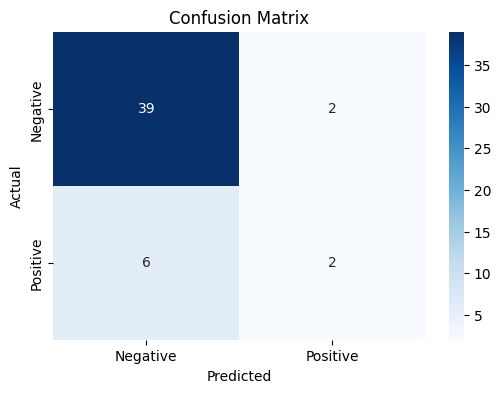

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
                          

# Evaluate the model with a confusion matrix and classification report

rf_conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Confusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('model1.png')
plt.show()

## Extracting the important features:
    I will use these two:

    1. rf feature_importances_
    2. from sklearn.feature_selection import SelectFromModel
    3. Using feature_importances_:

**i will select a threshold of > 0.05 and use the selected features to train the model on the data again and compare the metrics**

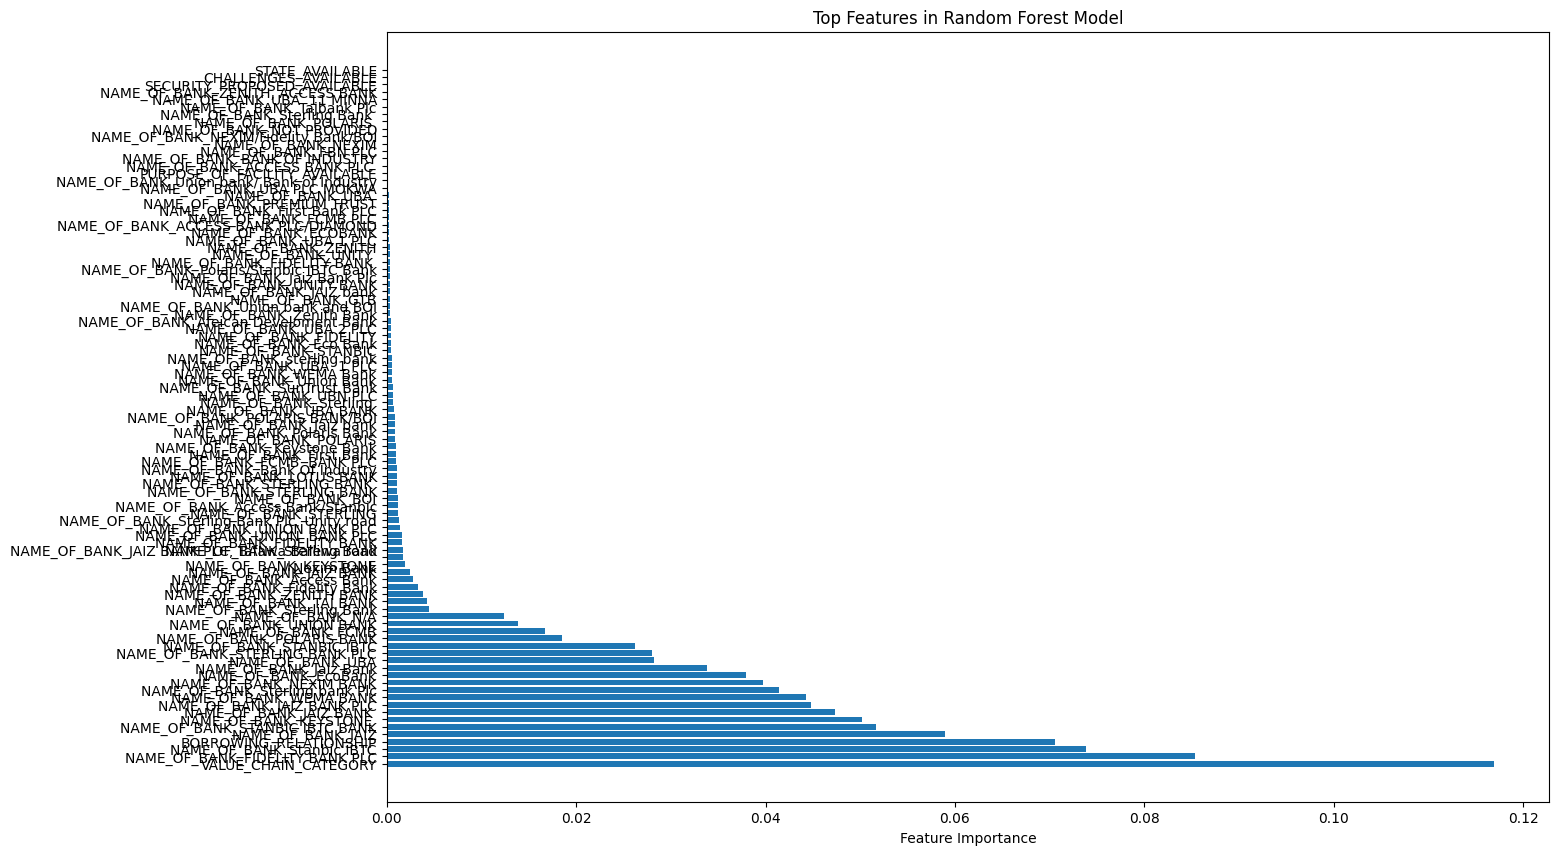

In [25]:
# Access Feature Importance
feature_importance = rf_model.feature_importances_

# Map Feature Importance to Features
feature_names = list(X_encoded.columns)
feature_importance_map = dict(zip(feature_names, feature_importance))

# Sort and Visualize
sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)
top_features = [feature[0] for feature in sorted_features]
top_importance = [feature[1] for feature in sorted_features]

plt.figure(figsize=[15,10])
plt.barh(top_features, top_importance)
plt.xlabel('Feature Importance')
plt.title('Top Features in Random Forest Model')
plt.savefig('rf_features.png')
plt.show()

In [26]:
########

rf_features= pd.DataFrame({'Feature': top_features, 'Importance': top_importance})
rf_features = rf_features.sort_values(by='Importance', ascending=False)
rf_features 

,Feature,Importance
0,VALUE_CHAIN_CATEGORY,0.116903
1,NAME_OF_BANK_FIDELITY BANK PLC,0.085325
2,NAME_OF_BANK_Stanbic IBTC,0.073839
3,BORROWING_RELATIONSHIP,0.070561
4,NAME_OF_BANK_JAIZ,0.058930
...,...,...
84,NAME_OF_BANK_NEXIM,0.000000
82,NAME_OF_BANK_BANK OF INDUSTRY,0.000000
81,NAME_OF_BANK_ACCESS BANK PLC,0.000000
80,PURPOSE_OF_FACILITY_AVAILABLE,0.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   S/N                                   243 non-null    int64 
 1   DATE                                  243 non-null    object
 2   NAME_OF_ENTITY                        241 non-null    object
 3   NATURE_OF_BUSINESS                    242 non-null    object
 4   BUSINESS_PROJECT                      243 non-null    int32 
 5   CONTACT_NAME_PHONE_EMAIL_OF_PROMOTER  243 non-null    object
 6   PROPOSED_FACILITY_AMOUNT              243 non-null    int32 
 7   PURPOSE_OF_FACILITY                   243 non-null    object
 8   VALUE_CHAIN_CATEGORY                  243 non-null    int64 
 9   NAME_OF_BANK                          243 non-null    object
 10  BORROWING_RELATIONSHIP                243 non-null    int32 
 11  FRESH_LOAN_REQUEST              

# Using CatBoost

In [28]:
import catboost as cb
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import (accuracy_score, f1_score, fbeta_score, recall_score, precision_score, 
                            classification_report, roc_auc_score, confusion_matrix, auc)
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, rand
import logging
from typing import Dict, Union, Any, Tuple
import random
import sys
from tqdm import tqdm

import warnings;warnings.filterwarnings(action='ignore')

In [29]:
df.columns = df.columns.str.lower()
pd.set_option('display.max_columns', None);df.head(3)

,s/n,date,name_of_entity,nature_of_business,business_project,contact_name_phone_email_of_promoter,proposed_facility_amount,purpose_of_facility,value_chain_category,name_of_bank,borrowing_relationship,fresh_loan_request,request_submitted_to_bank,security_proposed,feasibility_study_available,highlights_of_discussion,rm_bm_name_phone_number,rm_bm_email,status_update,challenges,proposed_next_steps,state,target
0,1,1/2/2023,COM10001,RICE PROCESSING,1,AVAILABLE,2000000000,AVAILABLE,3,FIDELITY BANK PLC,1,1,1,AVAILABLE,1,AVAILABLE,AVAILABLE,AVAILABLE,WE AREAWAITING CREDIT COMMITY DECITION ON WEAT...,AVAILABLE,AVAILABLE,AVAILABLE,1
1,2,1/2/2023,COM10002,FERTILIZER DISTRIBUTION ACROSS ADAMAWA,1,AVAILABLE,50000000,AVAILABLE,1,FIDELITY BANK PLC,1,1,1,AVAILABLE,1,AVAILABLE,AVAILABLE,AVAILABLE,WE ARE CURRENTLY WAITING FOR THE CLIENT TO CHO...,AVAILABLE,AVAILABLE,AVAILABLE,1
2,3,1/2/2023,COM10003,BULL FEED FINISHING,1,AVAILABLE,9000000,AVAILABLE,2,STANBIC IBTC,1,1,1,AVAILABLE,1,AVAILABLE,AVAILABLE,AVAILABLE,DOCUMENT YET TO BE PRESENTED,AVAILABLE,AVAILABLE,AVAILABLE,1


In [30]:
df.dtypes

s/n                                      int64
date                                    object
name_of_entity                          object
nature_of_business                      object
business_project                         int32
contact_name_phone_email_of_promoter    object
proposed_facility_amount                 int32
purpose_of_facility                     object
value_chain_category                     int64
name_of_bank                            object
borrowing_relationship                   int32
fresh_loan_request                       int32
request_submitted_to_bank                int32
security_proposed                       object
feasibility_study_available              int32
highlights_of_discussion                object
rm_bm_name_phone_number                 object
rm_bm_email                             object
status_update                           object
challenges                              object
proposed_next_steps                     object
state        

In [31]:
print('Categorical Features include: \n')
print(df.select_dtypes(include=['O', 'category']).columns.tolist())

print('\n\nNumerical Features include: \n')
print(df.select_dtypes(include=np.number).columns.tolist())

Categorical Features include: 

['date', 'name_of_entity', 'nature_of_business', 'contact_name_phone_email_of_promoter', 'purpose_of_facility', 'name_of_bank', 'security_proposed', 'highlights_of_discussion', 'rm_bm_name_phone_number', 'rm_bm_email', 'status_update', 'challenges', 'proposed_next_steps', 'state']


Numerical Features include: 

['s/n', 'business_project', 'proposed_facility_amount', 'value_chain_category', 'borrowing_relationship', 'fresh_loan_request', 'request_submitted_to_bank', 'feasibility_study_available', 'target']


In [32]:
pd.set_option('display.max_columns', None); df.head(1)

,s/n,date,name_of_entity,nature_of_business,business_project,contact_name_phone_email_of_promoter,proposed_facility_amount,purpose_of_facility,value_chain_category,name_of_bank,borrowing_relationship,fresh_loan_request,request_submitted_to_bank,security_proposed,feasibility_study_available,highlights_of_discussion,rm_bm_name_phone_number,rm_bm_email,status_update,challenges,proposed_next_steps,state,target
0,1,1/2/2023,COM10001,RICE PROCESSING,1,AVAILABLE,2000000000,AVAILABLE,3,FIDELITY BANK PLC,1,1,1,AVAILABLE,1,AVAILABLE,AVAILABLE,AVAILABLE,WE AREAWAITING CREDIT COMMITY DECITION ON WEAT...,AVAILABLE,AVAILABLE,AVAILABLE,1


In [33]:
df.dropna(inplace=True)

In [34]:
X = df.drop(['s/n', 'date', 'target'], axis=1)
y = df['target']
cat_features = np.where(X.dtypes=='O')[0]

In [35]:
y.value_counts()

target
0    205
1     36
Name: count, dtype: int64

## Hyperparameter Tuning and Training the best model

In [36]:
# # Configure logging
# logging.basicConfig(level=logging.INFO)
# logger = logging.getLogger(__name__)

# # ----------------------------------------------------------------------------------------------------------------------------------------------------- #
# class ClassifierObjective:
#     def __init__(self, dtrain, const_params, fold_count=5, have_gpu=False):
#         self._dtrain = dtrain
#         self._const_params = const_params.copy()
#         self._fold_count = fold_count
#         self._have_gpu = have_gpu
#         self._evaluated_count = 0
        
#     def __call__(self, hyper_params):
#         params = self._to_catboost_params(hyper_params)
#         params.update(self._const_params)
#         logger.info(f'Evaluating params={params}')

#         mean_aucs = []

#         for _ in range(self._fold_count):
#             cv_result = cb.cv(
#                 params=params,
#                 pool=self._dtrain,
#                 fold_count=self._fold_count,
#                 shuffle=True,
#                 seed=101,
#                 stratified=False
#             )
#             mean_aucs.append(cv_result['test-AUC-mean'].max())

#         max_mean_auc = np.mean(mean_aucs)
#         logger.info(f'Evaluated mean score={max_mean_auc}')

#         self._evaluated_count += 1
#         logger.info(f'Evaluated {self._evaluated_count} times')

#         return {'loss': -max_mean_auc, 'status': STATUS_OK}

#     def _to_catboost_params(self, hyper_params):
#         return {
#             'iterations': int(hyper_params['iterations']),
#             'depth': int(hyper_params['depth']),
#             'learning_rate': hyper_params['learning_rate'],
#             'subsample': hyper_params['subsample'],
#             'colsample_bylevel': hyper_params['colsample_bylevel'],
#             'l2_leaf_reg': hyper_params['l2_leaf_reg'],
#             'random_strength': hyper_params['random_strength'],
#             'scale_pos_weight': hyper_params['scale_pos_weight'],
#             'eval_metric': 'AUC',
#             'verbose': False
#         }

# # ----------------------------------------------------------------------------------------------------------------------------------------------------- #

# options = {
#     'iterations': hp.quniform('iterations', 100, 2500, 50),  # Number of boosting rounds
#     'depth': hp.quniform('depth', 3, 16, 1), # Maximum depth of a tree, controls the complexity of the model
#     'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.1)), # Step size shrinkage used in each boosting update
#     'subsample': hp.uniform('subsample', 0.4, 1.0), # Fraction of samples used for fitting the trees, controls feature randomness
#     'colsample_bylevel': hp.uniform('colsample_bylevel', 0.3, 1.0),  # Fraction of features used for fitting the trees, controls tree randomness
#     'l2_leaf_reg': hp.loguniform('l2_leaf_reg', np.log(1e-3), np.log(10.0)),  # L2 regularization term on weights
#     'random_strength': hp.loguniform('random_strength', np.log(1e-3), np.log(10.0)),  # Random strength, helps to deal with overfitting
#     'scale_pos_weight': hp.uniform('scale_pos_weight', 6.2, 15),  # Controls the balance of positive and negative weights, useful for imbalanced classes
# }

# # Convert certain hyperparameters to integers
# int_vals = ['depth', 'iterations']
# space = {k: (int(val) if isinstance(val, (int, float)) and k in int_vals else val)
#              for k, val in options.items()}

# # ----------------------------------------------------------------------------------------------------------------------------------------------------- #
# def optimize_hyperparameters(space: Dict[str, Union[float, int]],
#                              dtrain, const_params, num_folds, have_gpu,
#                              max_evals=100):

#     # constant parameters
#     const_params = {
#             'objective': 'Logloss',
#             'eval_metric': 'AUC',
#             'random_seed': 101,
#     }

#     objective = ClassifierObjective(dtrain=dtrain, const_params=const_params, fold_count=num_folds, have_gpu=have_gpu)
#     trials = Trials()
    
#     best = fmin(fn=lambda space: objective(space),
#                 space=options,
#                 algo=tpe.suggest,
#                 max_evals=max_evals)
    
#     return best

# # ----------------------------------------------------------------------------------------------------------------------------------------------------- #
# def train_model(X: pd.DataFrame, y: pd.Series, const_params: Dict[str, Any],
#                 max_evals: int = 100, use_default: bool = False) -> Tuple[cb.CatBoostClassifier, Dict[str, Any]]:
#     # Create Pool for training and validation
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
#     dtrain = cb.Pool(X_train.apply(lambda x: x.fillna('NaN') if x.dtype == 'O' else x),
#                      y_train,
#                      cat_features=np.where(X_train.dtypes=='O')[0])
#     dval = cb.Pool(X_test.apply(lambda x: x.fillna('NaN') if x.dtype == 'O' else x),
#                    y_test,
#                    cat_features=np.where(X_test.dtypes=='O')[0])

#     if use_default:
#         # Use default hyperparameters
#         hyper_params = const_params
#     else:
#         # Find best hyperparameters
#         best = optimize_hyperparameters(space, dtrain, const_params, num_folds=15, have_gpu=False, max_evals=max_evals)
#         hyper_params = best.copy()
#         hyper_params.update(const_params)
        
#         hyper_params['iterations'] = int(hyper_params['iterations'])
#         hyper_params['_depth'] = int(hyper_params['_depth'])

#         # Print the best hyperparameters
#         logger.info("\n\nThe Best Hyperparameters: %s", hyper_params)

#     # Train the model
#     model = cb.CatBoostClassifier(**hyper_params)
#     model.fit(dtrain, eval_set=dval, verbose=False)

#     return model, hyper_params

# # ----------------------------------------------------------------------------------------------------------------------------------------------------- #
# # Set GPU usage and hyperparameter optimization iterations
# have_gpu = False
# hyperopt_iterations = 5

# # constant parameters
# const_params = {
#         'loss_function': 'Logloss',
#         'eval_metric': 'AUC',
#         'random_seed': 101,
# }

# dtrain = cb.Pool(X.apply(lambda x: x.fillna('NaN') if x.dtype == 'O' else x),
#                  y,
#                  cat_features=np.where(X.dtypes=='O')[0])

# # hyperparameter tuning
# best_hyperparams = optimize_hyperparameters(space=options,
#                                             dtrain=dtrain,
#                                             const_params=const_params,
#                                             num_folds=5,
#                                             have_gpu=have_gpu,
#                                             max_evals=hyperopt_iterations)

# # Train the model
# best_model, best_hyperparams = train_model(X, y, const_params, max_evals=hyperopt_iterations, use_default=False)  

In [37]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.30, random_state=101, stratify=y)
print(X_train.shape, y_val.shape, X_val.shape, y_val.shape)

(168, 20) (73,) (73, 20) (73,)


In [38]:
train = cb.Pool(data=X_train,
                label=y_train,
                cat_features=np.where(X_train.dtypes == 'O')[0])

val = cb.Pool(data=X_val,
              label=y_val,
              cat_features=np.where(X_val.dtypes == 'O')[0])

In [39]:
%%time
params = {
    'iterations': 2500,
    'depth': 7,
    'learning_rate': 0.009325796193999505,
    'subsample': 0.46531787114931844,
    'colsample_bylevel': 0.9650283295536171,
    'l2_leaf_reg': 0.39058529922759216,
    'random_strength': 3.770450262492269,
    'scale_pos_weight': 13.660876404985844,
    'eval_metric': 'AUC',
    'verbose': False,
    'objective': 'Logloss',
    'random_seed': 101
}

# Train the CatBoost model
clf = cb.train(pool=train, params=params, verbose=False)
clf.fit(train, verbose=False)

CPU times: total: 3min 11s
Wall time: 1min 57s


In [40]:
# Make predictions on the validation set
preds = clf.predict(val)

# Evaluate the model using ROC-AUC
roc_auc = roc_auc_score(val.get_label(), preds)
print(f"ROC-AUC Score: {roc_auc}") 

ROC-AUC Score: 0.8812316715542523


 ## Testing the model behaviour before deploying with Flask

In [87]:

#1	1/2/2023	COM10001	RICE PROCESSING	1	AVAILABLE	2000000000	AVAILABLE	3	FIDELITY BANK PLC	1	1	1	AVAILABLE	1	AVAILABLE	AVAILABLE	AVAILABLE	WE AREAWAITING CREDIT COMMITY DECITION ON WEAT...	AVAILABLE	AVAILABLE	AVAILABLE	1

 
import pandas as pd
df = pd.DataFrame({

 #Numerical Features include: 
 's/n':1,
 'business_project':1,
 'proposed_facility_amount':2000000000,
 'value_chain_category':3,
 'borrowing_relationship':1,
 'fresh_loan_request':1,
 'request_submitted_to_bank':1,
 'feasibility_study_available':1,
 'target':1
    }, index = [0])

In [85]:
df.head(1)

,s/n,business_project,proposed_facility_amount,value_chain_category,borrowing_relationship,fresh_loan_request,request_submitted_to_bank,feasibility_study_available,target
0,1,1,2000000000,3,11,1,1,1,1


In [86]:
 
result = clf.predict(df)

CatBoostError: Invalid cat_features[5] = 11 value: index must be < 9.

In [83]:
result

NameError: name 'result' is not defined

In [ ]:
if result ==1:
    print("CRG Worthy")
else:
    print("not CRG worthy")

In [ ]:
# model = cb.CatBoostClassifier(**params)
# model.fit(X_train, y_train, cat_features=np.where(X_train.dtypes == 'O')[0])

# # predict
# print("Accuracy:", accuracy_score(y_val, model.predict(y_val)))
# print("Precision:", precision_score(y_val, model.predict(y_val)))
# print("Recall:", recall_score(y_val, model.predict(y_val)))
# print("F1 Score:", f1_score(y_val, model.predict(y_val)))
# print("ROC AUC Score:", roc_auc_score(y_val, model.predict(y_val)))
# print("Classification Report:\n", classification_report(y_val, model.predict(y_val)))

# # Save the trained model
# import joblib;joblib.dump(model, 'catboost_model.joblib')

In [ ]:
from sklearn import metrics

def calculate_score_on_dataset(X, y, clf, dataset_type):
    pool = cb.Pool(data=X.apply(lambda x: x.fillna('NaN') if x.dtype == 'O' else x),
                label=y,
                cat_features=np.where(X.dtypes == 'O')[0])
    preds = clf.predict(pool)
    fpr, tpr, _ = metrics.roc_curve(y, preds)
    auc_score = metrics.auc(fpr, tpr)

    return fpr, tpr, auc_score

# Calculate scores and ROC curves for both training and val sets
fpr_train, tpr_train, score_train_cb = calculate_score_on_dataset(X_train, y_train, clf, 'Training')
fpr_test, tpr_test, score_test_cb = calculate_score_on_dataset(X_val, y_val, clf, 'Validation')

# Plot ROC curves in a single row subplot
plt.figure(figsize=(10, 5))

# Plot for Training set
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(score_train_cb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training')
plt.legend(loc='lower right')

# Plot for val set
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(score_test_cb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

print("AUC Score (Training):", score_train_cb)
print("AUC Score (Validation):", score_test_cb)

In [ ]:
import shap
# Create a summary plot using SHAP values
shap_values = clf.get_feature_importance(val, type='ShapValues')
shap.summary_plot(shap_values[:, :-1], pd.DataFrame(X_val, columns=X_val.columns))